Sentdex tutorial


In [1]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader as pdr
import pandas_datareader.data as web

from IPython.display import display # Allows the use of display() for DataFrames

# Pretty display for notebooks
%matplotlib inline

style.use('ggplot')

In [2]:
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2016, 12, 31)


# df = pdr.get_data_yahoo('TSLA', start, end)
# df.to_csv('tesla.csv')

# start = dt.datetime(2000, 1, 1)
# end = dt.datetime(2018, 1, 11)
# df_ibm = pdr.get_data_yahoo('IBM', start, end)
# df_ibm.to_csv('ibm.csv')
# df_apple = pdr.get_data_yahoo('AAPL', start, end)
# df_apple.to_csv('apple.csv')
# df_att = pdr.get_data_yahoo('T', start, end)
# df_att.to_csv('att.csv')


# # df = web.DataReader('NASDAQ:TSLA', 'google', start, end)

# print(df.head())

In [3]:
df = pd.read_csv('tesla.csv', parse_dates=True, index_col=0)
print df.head()

                 Open   High        Low      Close  Adj Close    Volume
Date                                                                   
2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900


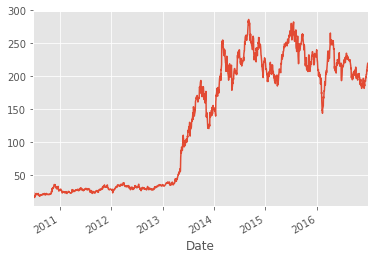

In [4]:
df['Adj Close'].plot()
plt.show()

In [5]:
# create 100 day moving average

df['100ma'] = df['Adj Close'].rolling(window=100).mean()

# drop rows with empty cells
df.dropna(inplace=True)

print df.head()
print df.tail()

                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2010-11-17  30.200001  30.750000  28.610001  29.490000  29.490000   750000   
2010-11-18  30.670000  30.740000  28.920000  29.889999  29.889999   956100   
2010-11-19  30.160000  31.370001  29.700001  30.990000  30.990000  1150500   
2010-11-22  31.570000  33.450001  31.500000  33.400002  33.400002  1529700   
2010-11-23  33.290001  35.680000  32.189999  34.570000  34.570000  1577800   

              100ma  
Date                 
2010-11-17  20.9879  
2010-11-18  21.0479  
2010-11-19  21.1195  
2010-11-22  21.2339  
2010-11-23  21.3876  
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2016-12-23  208.000000  213.449997  207.710007  213.339996  213.339996   
2016-12-27  214.880005  222.250000  214.419998  219.529999  219.529999   
201

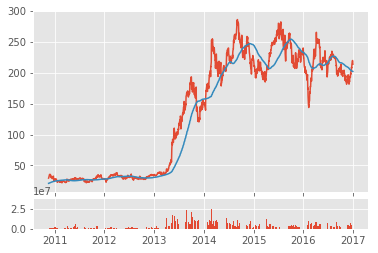

In [6]:
ax1 = plt.subplot2grid((6,1), (0, 0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5, 0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])
plt.show()

In [7]:
# Create Open high low close sample for 10 days at a time
# this helps reduce the amount of data you are trying to anlayse

df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()

print df_ohlc.head()
print df_volume.head()



                 open       high        low      close
Date                                                  
2010-11-17  29.490000  35.470001  29.490000  35.320000
2010-11-27  34.330002  35.330002  30.309999  30.309999
2010-12-07  31.559999  32.369999  28.530001  30.809999
2010-12-17  31.360001  32.630001  30.090000  30.090000
2010-12-27  25.549999  27.730000  25.549999  26.830000
Date
2010-11-17     7739700
2010-11-27     9108900
2010-12-07     6515800
2010-12-17     4500000
2010-12-27    24053500
Freq: 10D, Name: Volume, dtype: int64


In [8]:
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates

# reset dataframe index so that date is now a column
df_ohlc.reset_index(inplace=True)
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

print df_ohlc.head()

       Date       open       high        low      close
0  734093.0  29.490000  35.470001  29.490000  35.320000
1  734103.0  34.330002  35.330002  30.309999  30.309999
2  734113.0  31.559999  32.369999  28.530001  30.809999
3  734123.0  31.360001  32.630001  30.090000  30.090000
4  734133.0  25.549999  27.730000  25.549999  26.830000


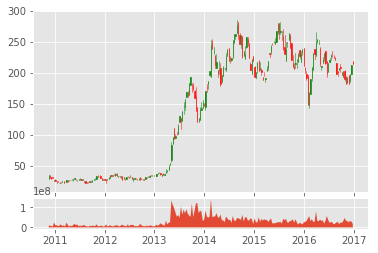

In [10]:
%matplotlib inline 
# switch to 'tk' to visulize the graph on a separate window
# plot ohlc in a candlestick graph
ax1 = plt.subplot2grid((6,1), (0, 0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5, 0), rowspan=1, colspan=1, sharex=ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)

plt.show()

In [13]:
import bs4 as bs #library for web scraping
import pickle
import requests

def save_sp500_tickers():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)
        
    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)
    return tickers

# save_sp500_tickers()


[u'MMM',
 u'ABT',
 u'ABBV',
 u'ACN',
 u'ATVI',
 u'AYI',
 u'ADBE',
 u'AMD',
 u'AAP',
 u'AES',
 u'AET',
 u'AMG',
 u'AFL',
 u'A',
 u'APD',
 u'AKAM',
 u'ALK',
 u'ALB',
 u'ARE',
 u'ALXN',
 u'ALGN',
 u'ALLE',
 u'AGN',
 u'ADS',
 u'LNT',
 u'ALL',
 u'GOOGL',
 u'GOOG',
 u'MO',
 u'AMZN',
 u'AEE',
 u'AAL',
 u'AEP',
 u'AXP',
 u'AIG',
 u'AMT',
 u'AWK',
 u'AMP',
 u'ABC',
 u'AME',
 u'AMGN',
 u'APH',
 u'APC',
 u'ADI',
 u'ANDV',
 u'ANSS',
 u'ANTM',
 u'AON',
 u'AOS',
 u'APA',
 u'AIV',
 u'AAPL',
 u'AMAT',
 u'APTV',
 u'ADM',
 u'ARNC',
 u'AJG',
 u'AIZ',
 u'T',
 u'ADSK',
 u'ADP',
 u'AZO',
 u'AVB',
 u'AVY',
 u'BHGE',
 u'BLL',
 u'BAC',
 u'BK',
 u'BAX',
 u'BBT',
 u'BDX',
 u'BRK.B',
 u'BBY',
 u'BIIB',
 u'BLK',
 u'HRB',
 u'BA',
 u'BWA',
 u'BXP',
 u'BSX',
 u'BHF',
 u'BMY',
 u'AVGO',
 u'BF.B',
 u'CHRW',
 u'CA',
 u'COG',
 u'CDNS',
 u'CPB',
 u'COF',
 u'CAH',
 u'CBOE',
 u'KMX',
 u'CCL',
 u'CAT',
 u'CBG',
 u'CBS',
 u'CELG',
 u'CNC',
 u'CNP',
 u'CTL',
 u'CERN',
 u'CF',
 u'SCHW',
 u'CHTR',
 u'CHK',
 u'CVX',
 u'CMG',
 u'C

In [ ]:
# create new directories
import os

def get_data_from_yahoo(reload_sp500=False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", "rb") as f:
            pickle.dump(tickers, f)
        
